In [711]:
#Importacion de los datos 
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from scipy.signal import medfilt
import random
from sklearn.metrics import r2_score  
from tabulate import tabulate

In [712]:
#Exportacion de los Datos desde el Excel 
df = pd.read_excel("filtragem_Dados.xlsx")
print(df)

    Tempo (min)    1bar    2bar    4bar    6bar
0             2   0.443   0.606   2.728   2.793
1             4   1.451   1.684   4.916   5.218
2             6   2.826   2.870   6.506   7.100
3             8   3.782   4.023   7.925   8.572
4            10   4.630   4.680   9.188   9.984
5            12   5.370   5.454  10.345  11.015
6            14   6.267   5.971  11.350  12.038
7            16   6.807   6.632  12.288  13.109
8            18   7.415   7.061  13.241  13.972
9            20   7.933   7.638  14.018  15.134
10           22   8.363   8.190  14.822  15.653
11           24   8.895   8.887  15.598  16.496
12           26   9.299   9.101  16.305  17.215
13           28   9.673   9.799  16.934  17.824
14           30  10.060  10.109  17.680  18.572
15           32  10.466  10.414  18.288  19.304
16           34  10.850  10.928  18.867  19.821
17           36  11.117  11.222  19.650  20.490
18           38  11.669  11.653  19.910  21.024
19           40  12.014  12.190  20.483 

In [713]:
#Asignacion 
tiempo = df['Tempo (min)']
presio_1bar = df['1bar']
presio_2bar= df['2bar']
presio_4bar = df['4bar']
presio_6bar= df['6bar']
tempo= df['Tempo (min)']

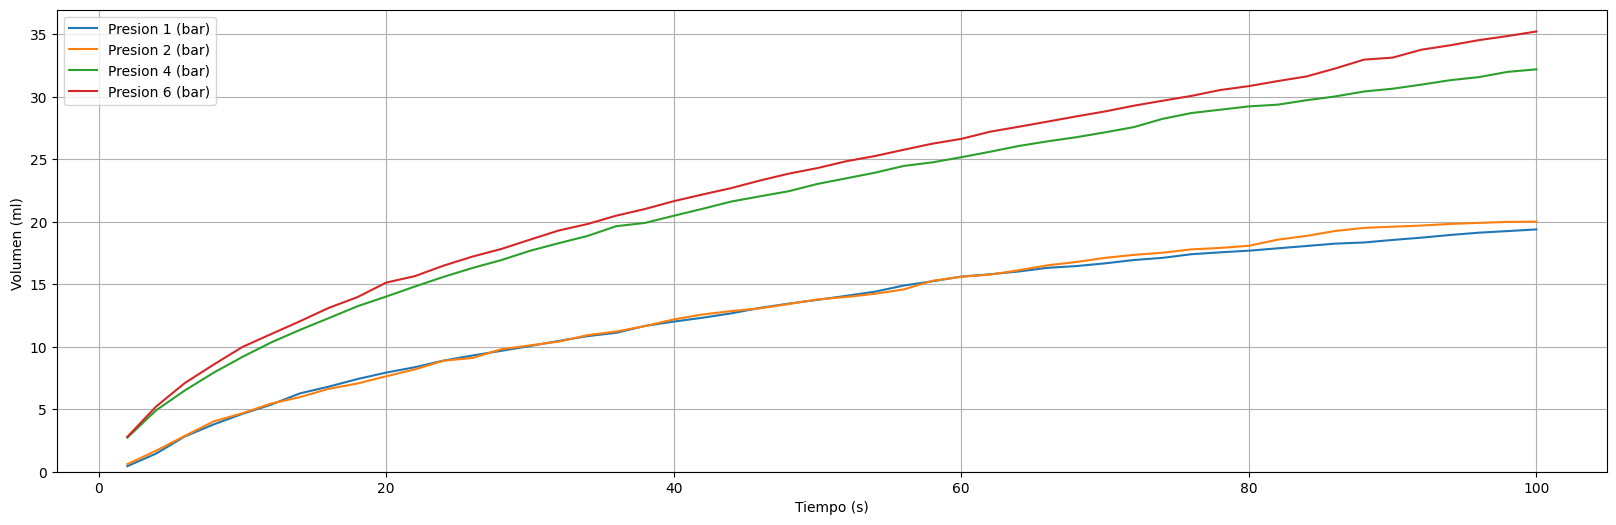

In [714]:
# Crear un gráfico con las cuatro variables en función del tiempo (Grafico N1)
plt.figure(figsize=(20, 6))
plt.plot(tiempo, presio_1bar, label='Presion 1 (bar)')
plt.plot(tiempo, presio_2bar, label='Presion 2 (bar)')
plt.plot(tiempo, presio_4bar, label='Presion 4 (bar)')
plt.plot(tiempo, presio_6bar, label='Presion 6 (bar)')
plt.ylim(ymin=0)
# Agregar etiquetas, leyendas y mostrar el gráfico
plt.xlabel('Tiempo (s)')
plt.ylabel('Volumen (ml) ')
plt.grid(True)
plt.legend()
plt.show() 

In [715]:
# Aplicar la función a cada columna para convertir a alguna unidad 
# Las unidades estan en ml en el excel 
def Conertir_unidad(valor):
    return valor / (1)
df['1bar'] = df['1bar'].apply(Conertir_unidad)
df['2bar'] = df['2bar'].apply(Conertir_unidad)
df['4bar'] = df['4bar'].apply(Conertir_unidad)
df['6bar'] = df['6bar'].apply(Conertir_unidad)

#Asignacion 
tiempo = df['Tempo (min)']
presio_1bar = df['1bar']
presio_2bar= df['2bar']
presio_4bar = df['4bar']
presio_6bar= df['6bar']
#Efecto de la eliminacion 
def eliminar_datos_iniciales(dataframe, cantidad_a_eliminar):
    if cantidad_a_eliminar < 0:
        raise ValueError("La cantidad a eliminar debe ser un número no negativo.")
    return dataframe[cantidad_a_eliminar:]

# Supongamos que tienes un DataFrame llamado df y quieres eliminar los primeros 5 datos de cada columna que mencionaste:
cantidad_a_eliminar = 3
presio_1bar = eliminar_datos_iniciales(df['1bar'], cantidad_a_eliminar)
presio_2bar = eliminar_datos_iniciales(df['2bar'], cantidad_a_eliminar)
presio_4bar = eliminar_datos_iniciales(df['4bar'], cantidad_a_eliminar)
presio_6bar = eliminar_datos_iniciales(df['6bar'], cantidad_a_eliminar)
tiempo = eliminar_datos_iniciales(df['Tempo (min)'], cantidad_a_eliminar)

def eliminar_datos_finales(dataframe, cantidad_a_eliminar):
    if cantidad_a_eliminar < 0:
        raise ValueError("La cantidad a eliminar debe ser un número no negativo.")
    return dataframe[:-cantidad_a_eliminar]
# Supongamos que tienes un DataFrame llamado df y quieres eliminar los últimos 5 datos de cada columna que mencionaste:
cantidad_a_eliminar = 6
presio_1bar = eliminar_datos_finales(df['1bar'], cantidad_a_eliminar)
presio_2bar = eliminar_datos_finales(df['2bar'], cantidad_a_eliminar)
presio_4bar = eliminar_datos_finales(df['4bar'], cantidad_a_eliminar)
presio_6bar = eliminar_datos_finales(df['6bar'], cantidad_a_eliminar)
tiempo = eliminar_datos_finales(df['Tempo (min)'], cantidad_a_eliminar)

In [716]:
def regresion_cuadratica(x, y):
    # Realizar el ajuste de regresión cuadrática
    coefficients = np.polyfit(x, y, 2)  # Ajuste de grado 2 para una regresión cuadrática
    # Coeficientes de la regresión cuadrática
    a, b, c = coefficients
    return a, b, c

#Aplicando regresion cuadratica directa y derivando el modelo 
a1, b1, c1 = regresion_cuadratica(tiempo, presio_1bar)
a2, b2, c2 = regresion_cuadratica(tiempo, presio_2bar)
a4, b4, c4 = regresion_cuadratica(tiempo, presio_4bar)
a6, b6, c6 = regresion_cuadratica(tiempo, presio_6bar)

#Creando el conjunto de dados 
data_1 = [
    [" 1bar", a1,b1,c1],
    ["2 bar", a2,b2,c2],
    ["4 bar", a4,b4,c4],
    ["6 bar ", a6,b6,c6],
]
# Cabeceras de la tabla
headers = ["Presion", "A"," B","C"]
colalign = ["center"] * len(headers)
# Crear la tabla utilizando la función tabulate
tabla = tabulate(data_1, headers, tablefmt="grid", colalign=colalign)
# Imprimir la tabla
print(tabla)

+-----------+-------------+----------+---------+
|  Presion  |      A      |     B    |    C    |
+===========+=============+==========+=========+
|   1bar    | -0.00175442 | 0.347355 | 1.08552 |
+-----------+-------------+----------+---------+
|   2 bar   | -0.00143824 | 0.326992 | 1.30113 |
+-----------+-------------+----------+---------+
|   4 bar   | -0.00254098 | 0.515058 | 4.00163 |
+-----------+-------------+----------+---------+
|   6 bar   | -0.00251691 | 0.530708 | 4.44753 |
+-----------+-------------+----------+---------+


In [717]:
########### Calculo de los parametros (Revisar Unidades)
#Unidades de 
viscocidad_medio=0.001
#Unidades de m2
area_filtro=0.0039
#Densidad en 
densidad_solidos=1500
#Presion en pa 
presio_1=100000
presio_2=200000
presio_4=400000
presio_6=600000

def calcular_rm(intercepto,presion):
    rm = (intercepto * area_filtro * presion) /(viscocidad_medio)
    resultado_formateado = "{:.2e}".format(rm)  
    return resultado_formateado

#### Revisar estos parametros de regresion 

resultado_RM1= calcular_rm(b2,presio_1)
resultado_RM2= calcular_rm(b2,presio_2)
resultado_RM4= calcular_rm(b4,presio_4)
resultado_RM6= calcular_rm(b6,presio_6)


def calcular_alfa(pendiente,presion):
    alfa = (pendiente *2*((area_filtro)^2 )* presion) /((viscocidad_medio)*(densidad_solidos))
    resultado_formateado_alfa = "{:.2e}".format(alfa)  
    return resultado_formateado_alfa

resultado_alfa1= calcular_rm(2*a1,presio_1)
resultado_alfa2= calcular_rm(2*a2,presio_2)
resultado_alfa4= calcular_rm(2*a4,presio_4)
resultado_alfa6= calcular_rm(2*a6,presio_6)

data = [
    [" 1bar", resultado_RM1,resultado_alfa1],
    ["2 bar", resultado_RM2,resultado_alfa2],
    ["4 bar", resultado_RM4,resultado_alfa4],
    ["6 bar ", resultado_RM6,resultado_alfa6],
]
# Cabeceras de la tabla
headers = ["Presion", " Rm [m^(-1)] "," Alfa (Resistencia a la filtracion ) [m/kg]"]
# Crear la tabla utilizando la función tabulate
tabla = tabulate(data, headers, tablefmt="grid")
# Imprimir la tabla
print(tabla)

+-----------+-----------------+-----------------------------------------------+
| Presion   |    Rm [m^(-1)]  |    Alfa (Resistencia a la filtracion ) [m/kg] |
+===========+=================+===============================================+
| 1bar      |   128000        |                                         -1370 |
+-----------+-----------------+-----------------------------------------------+
| 2 bar     |   255000        |                                         -2240 |
+-----------+-----------------+-----------------------------------------------+
| 4 bar     |   803000        |                                         -7930 |
+-----------+-----------------+-----------------------------------------------+
| 6 bar     |        1.24e+06 |                                        -11800 |
+-----------+-----------------+-----------------------------------------------+


In [718]:
#Definicion de funciones 

def smooth_data(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

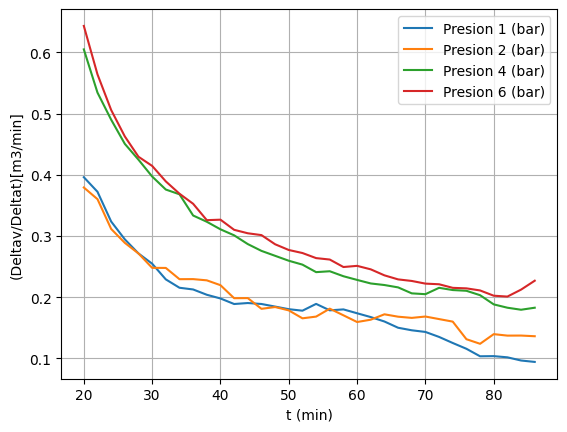

5.108772202062628e-05 -0.008813881421886929 0.49366888416730315
+-----------+-------------+-------------+----------+
|  Presion  |      A      |      B      |    C     |
+===========+=============+=============+==========+
|   1bar    | 5.10877e-05 | -0.00881388 | 0.493669 |
+-----------+-------------+-------------+----------+
|   2 bar   | 6.61665e-05 | -0.00983099 | 0.508795 |
+-----------+-------------+-------------+----------+
|   4 bar   | 0.000118867 | -0.0175093  | 0.837959 |
+-----------+-------------+-------------+----------+
|   6 bar   | 0.00012752  | -0.0183993  |    66    |
+-----------+-------------+-------------+----------+


In [719]:
#Grafico N2
#Procesamiento de datos 
# Crear listas para almacenar las diferencias para cada variable
deltas_1bar = []
deltas_2bar = []
deltas_4bar = []
deltas_6bar = []
deltas_tiempo=[]
# Calcular las diferencias entre valores sucesivos para cada variable(Tiempo y volumen)
for i in range(1, len(presio_1bar)):
    delta_1bar = presio_1bar[i] - presio_1bar[i - 1]
    delta_2bar = presio_2bar[i] - presio_2bar[i - 1]
    delta_4bar = presio_4bar[i] - presio_4bar[i - 1]
    delta_6bar = presio_6bar[i] - presio_6bar[i - 1]
    delta_tiempo=tempo[i]-tempo[i - 1]

    # Agregar las diferencias a las listas correspondientes
    deltas_1bar.append(delta_1bar)
    deltas_2bar.append(delta_2bar)
    deltas_4bar.append(delta_4bar)
    deltas_6bar.append(delta_6bar)
    deltas_tiempo.append(delta_tiempo)

####Hacer grafico con las diferencias de volumen en vuncion del tiempo 
resultados_1a = [x / y for x, y in zip(deltas_1bar, deltas_tiempo)]
resultados_2a = [x / y for x, y in zip(deltas_2bar, deltas_tiempo)]
resultados_4a = [x / y for x, y in zip(deltas_4bar,deltas_tiempo)]
resultados_6a = [x / y for x, y in zip(deltas_6bar, deltas_tiempo)]

primer_valor_1 = tempo.pop(0)
window_size = 10
# Suavizar los datos
smoothed_y1 = smooth_data(resultados_1a, window_size)
smoothed_y2 = smooth_data(resultados_2a, window_size)
smoothed_y4 = smooth_data(resultados_4a, window_size)
smoothed_y6 = smooth_data(resultados_6a, window_size)
###########################################################
data_x=tiempo[window_size-1:]
# Asegurarse de que todas las listas tengan la misma longitud
min_length = min(len(smoothed_y1), len(smoothed_y2), len(smoothed_y4), len(smoothed_y6))
smoothed_y1 = smoothed_y1[:min_length]
smoothed_y2 = smoothed_y2[:min_length]
smoothed_y4 = smoothed_y4[:min_length]
smoothed_y6 = smoothed_y6[:min_length]
data_x = data_x[:min_length]
# Crear un gráfico con las cuatro variables en función del tiempo
plt.plot(data_x, smoothed_y1, label='Presion 1 (bar)')
plt.plot(data_x, smoothed_y2, label='Presion 2 (bar)')
plt.plot(data_x, smoothed_y4, label='Presion 4 (bar)')
plt.plot(data_x, smoothed_y6, label='Presion 6 (bar)')
# Agregar etiquetas, leyendas y mostrar el gráfico
plt.xlabel('t (min)')
plt.ylabel('(Deltav/Deltat)[m3/min]')
plt.grid(True)
plt.legend()
plt.show()

A1, B1, C1 = regresion_cuadratica(data_x, smoothed_y1)
A2, B2, C2 = regresion_cuadratica(data_x, smoothed_y2)
A4, B4, C4 = regresion_cuadratica(data_x, smoothed_y4)
A6, B6, C6 = regresion_cuadratica(data_x, smoothed_y6)

print(A1, B1, C1)
#Creando el conjunto de dados 
data_2 = [
    [" 1bar", A1,B1,C1],
    ["2 bar", A2,B2,C2],
    ["4 bar", A4,B4,C4],
    ["6 bar ", A6,B6,66],
]
# Cabeceras de la tabla
headers = ["Presion", "A"," B","C"]
colalign = ["center"] * len(headers)
# Crear la tabla utilizando la función tabulate
tabla_2 = tabulate(data_2, headers, tablefmt="grid", colalign=colalign)
# Imprimir la tabla
print(tabla_2)


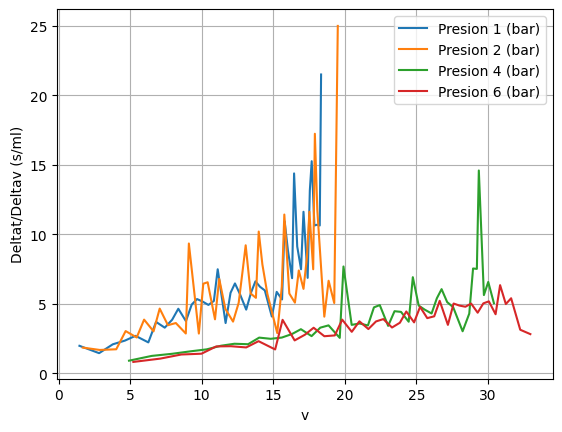

In [720]:
#Grafico 3 
# Dividir cada elemento de lista1 por el elemento correspondiente de lista2
resultados_1 = [x / y for x, y in zip(deltas_tiempo, deltas_1bar)]
resultados_2 = [x / y for x, y in zip(deltas_tiempo, deltas_2bar)]
resultados_4 = [x / y for x, y in zip(deltas_tiempo, deltas_4bar)]
resultados_6 = [x / y for x, y in zip(deltas_tiempo, deltas_6bar)]
primer_valor_1 = presio_1bar.pop(0)
primer_valor_2 = presio_2bar.pop(0)
primer_valor_3 = presio_4bar.pop(0)
primer_valor_4 = presio_6bar.pop(0)
nuevo_valor = 25
resultados_2[-1] = nuevo_valor
# Crear un gráfico con las cuatro variables en función del tiempo
plt.plot(presio_1bar, resultados_1, label='Presion 1 (bar)')
plt.plot(presio_2bar, resultados_2, label='Presion 2 (bar)')
plt.plot(presio_4bar, resultados_4, label='Presion 4 (bar)')
plt.plot(presio_6bar, resultados_6, label='Presion 6 (bar)')
# Agregar etiquetas, leyendas y mostrar el gráfico
plt.xlabel('v')
plt.ylabel('Deltat/Deltav (s/ml)')
plt.grid(True)
plt.legend()
plt.show()

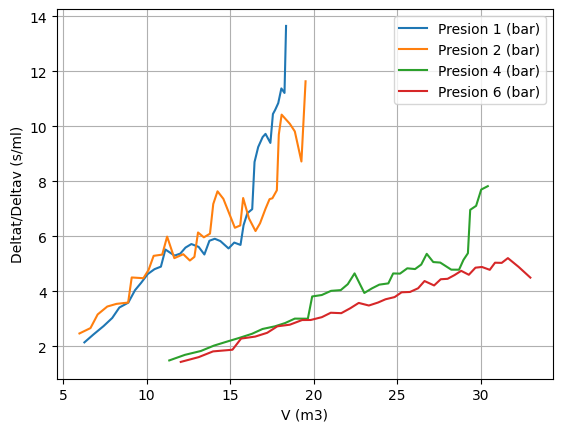

In [721]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que ya tienes las listas resultados_1, resultados_2, resultados_4 y resultados_6

def smooth_data(data, window_size):
    # Crear un kernel de ventana de 6
    kernel = np.ones(window_size) / window_size
    # Aplicar la convolución para suavizar los datos
    smoothed_data = np.convolve(data, kernel, 'valid')
    return smoothed_data

window_size = 6

# Aplicar la media móvil a los datos
smoothed_results_1 = smooth_data(resultados_1, window_size)
smoothed_results_2 = smooth_data(resultados_2, window_size)
smoothed_results_4 = smooth_data(resultados_4, window_size)
smoothed_results_6 = smooth_data(resultados_6, window_size)

# Crear un gráfico con las variables suavizadas en función de las presiones
plt.plot(presio_1bar[window_size-1:], smoothed_results_1, label='Presion 1 (bar)')
plt.plot(presio_2bar[window_size-1:], smoothed_results_2, label='Presion 2 (bar)')
plt.plot(presio_4bar[window_size-1:], smoothed_results_4, label='Presion 4 (bar)')
plt.plot(presio_6bar[window_size-1:], smoothed_results_6, label='Presion 6 (bar)')

# Agregar etiquetas, leyendas y mostrar el gráfico
plt.xlabel('V (m3)')
plt.ylabel('Deltat/Deltav (s/ml)')
plt.grid(True)
plt.legend()
plt.show()

Resultados para Presion 2 (bar):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     170.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.32e-15
Time:                        18:40:29   Log-Likelihood:                -60.023
No. Observations:                  38   AIC:                             124.0
Df Residuals:                      36   BIC:                             127.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.97

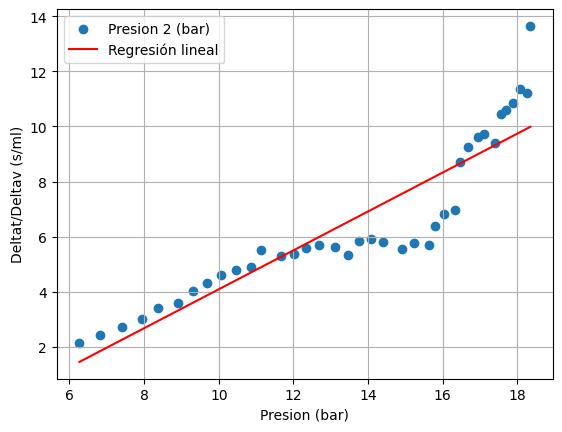

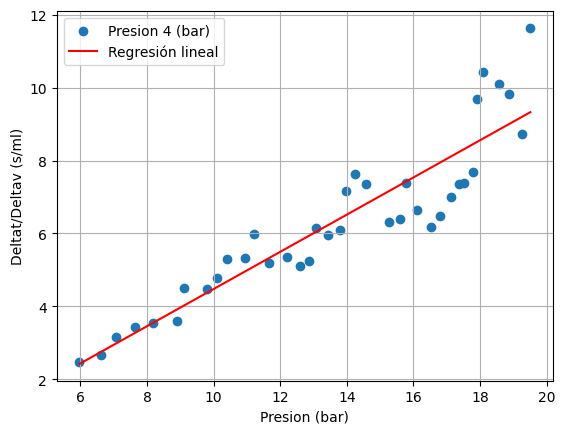

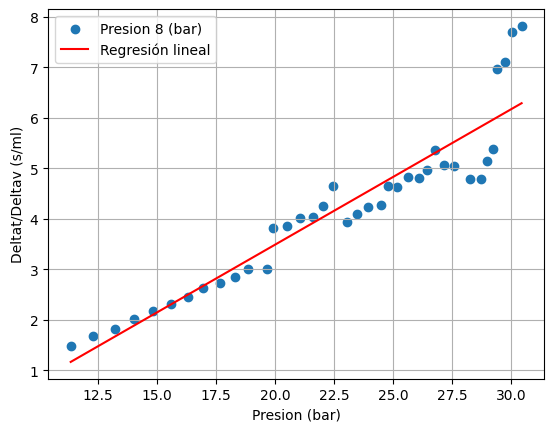

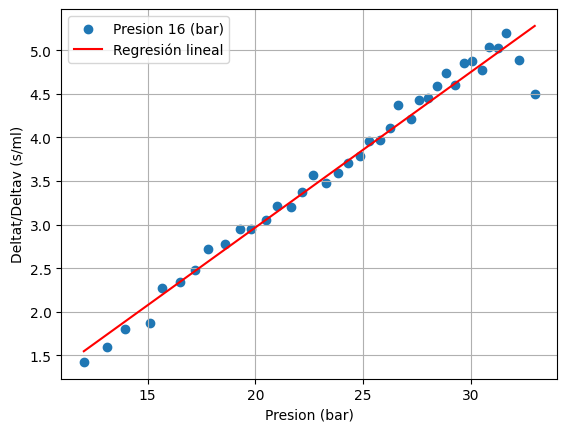

In [722]:


# Datos de ejemplo (reemplaza con tus datos reales)
presiones = [presio_1bar[window_size-1:], presio_2bar[window_size-1:], presio_4bar[window_size-1:], presio_6bar[window_size-1:]]
smoothed_results = [smoothed_results_1, smoothed_results_2, smoothed_results_4, smoothed_results_6]

# Realizar una regresión lineal y mostrar los parámetros estadísticos para cada conjunto de datos
for i in range(4):
    x = np.array(presiones[i])
    y = np.array(smoothed_results[i])

    x = sm.add_constant(x)  # Agregar una constante (intercepto) al modelo

    modelo = sm.OLS(y, x).fit()
    
    # Crear un resumen de los resultados del modelo
    print(f"Resultados para Presion {2 ** (i + 1)} (bar):")
    print(modelo.summary())
    
    # Crear un gráfico para la regresión
    plt.figure()
    plt.scatter(presiones[i], y, label=f'Presion {2 ** (i + 1)} (bar)')
    plt.plot(presiones[i], modelo.predict(x), color="red", label="Regresión lineal")
    plt.xlabel("Presion (bar)")
    plt.ylabel("Deltat/Deltav (s/ml)")
    plt.grid(True)
    plt.legend()

plt.show()
